In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm

In [2]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
from utils import train_transforms, test_transforms, visualise_transformation

In [4]:
from torchvision import datasets
train_data= datasets.CIFAR10(root= '../data', train= True, download= True, transform= train_transforms)
test_data= datasets.CIFAR10(root= '../data', train= False, download= True, transform= test_transforms)

100%|██████████| 170498071/170498071 [00:02<00:00, 73901753.84it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [5]:
dataloader_args= dict(shuffle= True, batch_size= 512, num_workers= 2, pin_memory= True) if torch.cuda.is_available() else dict(shuffle= True, batch_size= 64)
train_loader= torch.utils.data.DataLoader(train_data, **dataloader_args)
test_loader= torch.utils.data.DataLoader(test_data, **dataloader_args)

Files already downloaded and verified
Files already downloaded and verified


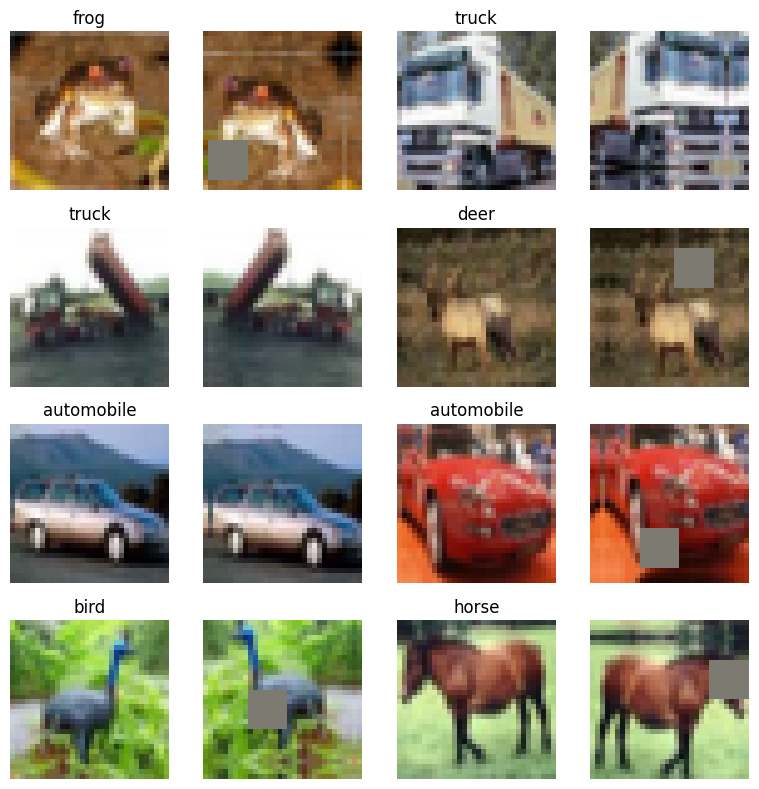

In [6]:
visualise_transformation()

In [7]:
from model import Net
model= Net().to(device)
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,728
              ReLU-5          [-1, 128, 32, 32]               0
       BatchNorm2d-6          [-1, 128, 32, 32]             256
         MaxPool2d-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
              ReLU-9          [-1, 128, 16, 16]               0
      BatchNorm2d-10          [-1, 128, 16, 16]             256
           Conv2d-11          [-1, 128, 16, 16]         147,456
             ReLU-12          [-1, 128, 16, 16]               0
      BatchNorm2d-13          [-1, 128, 16, 16]             256
           Conv2d-14          [-1, 256,

In [8]:
from train_test import train, test

In [9]:
!pip install torch_lr_finder

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.34E-05


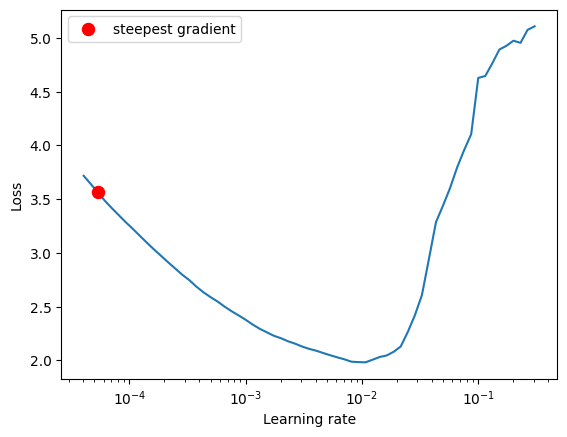

In [10]:
from torch_lr_finder import LRFinder

optimizer = optim.Adam(model.parameters(), lr=0.00001)
lr_finder = LRFinder(model, optimizer, criterion=nn.CrossEntropyLoss(), device='cuda')

lr_finder.range_test(train_loader, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

In [11]:
from torch.optim.lr_scheduler import OneCycleLR

epochs = 24
optimizer = optim.Adam(model.parameters(), lr=5.34E-05)
# Initialize the OneCycleLR scheduler
scheduler = OneCycleLR(optimizer, max_lr=5.34E-04, epochs=epochs, steps_per_epoch=len(train_loader),pct_start=0.2)

learning_rate=[]
train_accuracy=[]
test_accuracy=[]
train_losses=[]
test_losses=[]

for epoch in range(1, epochs + 1):
    print("EPOCH:", epoch)

    print('Learning rate:', optimizer.param_groups[0]['lr'],'\n')
    learning_rate.append(optimizer.param_groups[0]['lr'])

    train_acc,train_loss= train(model, device, train_loader, optimizer,scheduler)
    test_acc,test_loss= test(model, device, test_loader)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss.cpu())

EPOCH: 1
Learning rate: 2.136e-05 



Loss=1.3702218532562256 Accuracy=40.09: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]



Test set: Average loss: 0.0026, Accuracy: 5446/10000 (54.46%)

EPOCH: 2
Learning rate: 7.454543749688727e-05 



Loss=1.104994773864746 Accuracy=56.39: 100%|██████████| 98/98 [00:21<00:00,  4.55it/s]



Test set: Average loss: 0.0022, Accuracy: 6104/10000 (61.04%)

EPOCH: 3
Learning rate: 0.000212030192857904 



Loss=1.006832242012024 Accuracy=63.45: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]



Test set: Average loss: 0.0019, Accuracy: 6748/10000 (67.48%)

EPOCH: 4
Learning rate: 0.00037675912514181906 



Loss=0.7790557146072388 Accuracy=69.80: 100%|██████████| 98/98 [00:21<00:00,  4.55it/s]



Test set: Average loss: 0.0016, Accuracy: 7242/10000 (72.42%)

EPOCH: 5
Learning rate: 0.0005003709645927403 



Loss=0.7131277918815613 Accuracy=75.04: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]



Test set: Average loss: 0.0013, Accuracy: 7767/10000 (77.67%)

EPOCH: 6
Learning rate: 0.0005338420875790498 



Loss=0.6331875324249268 Accuracy=78.93: 100%|██████████| 98/98 [00:21<00:00,  4.57it/s]



Test set: Average loss: 0.0012, Accuracy: 7993/10000 (79.93%)

EPOCH: 7
Learning rate: 0.0005287823557554768 



Loss=0.4634951949119568 Accuracy=81.90: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]



Test set: Average loss: 0.0011, Accuracy: 8200/10000 (82.00%)

EPOCH: 8
Learning rate: 0.0005167295724780186 



Loss=0.5226527452468872 Accuracy=83.38: 100%|██████████| 98/98 [00:21<00:00,  4.51it/s]



Test set: Average loss: 0.0010, Accuracy: 8354/10000 (83.54%)

EPOCH: 9
Learning rate: 0.0004980057077940551 



Loss=0.416404128074646 Accuracy=85.56: 100%|██████████| 98/98 [00:21<00:00,  4.48it/s]



Test set: Average loss: 0.0009, Accuracy: 8475/10000 (84.75%)

EPOCH: 10
Learning rate: 0.00047311093858892864 



Loss=0.4085570275783539 Accuracy=87.09: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]



Test set: Average loss: 0.0009, Accuracy: 8557/10000 (85.57%)

EPOCH: 11
Learning rate: 0.00044271028719283263 



Loss=0.30620402097702026 Accuracy=88.26: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]



Test set: Average loss: 0.0008, Accuracy: 8577/10000 (85.77%)

EPOCH: 12
Learning rate: 0.00040761585641596886 



Loss=0.23785431683063507 Accuracy=89.75: 100%|██████████| 98/98 [00:21<00:00,  4.58it/s]



Test set: Average loss: 0.0008, Accuracy: 8672/10000 (86.72%)

EPOCH: 13
Learning rate: 0.0003687651355734508 



Loss=0.27422720193862915 Accuracy=90.97: 100%|██████████| 98/98 [00:21<00:00,  4.54it/s]



Test set: Average loss: 0.0007, Accuracy: 8746/10000 (87.46%)

EPOCH: 14
Learning rate: 0.0003271959570183918 



Loss=0.2187431901693344 Accuracy=92.06: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]



Test set: Average loss: 0.0007, Accuracy: 8852/10000 (88.52%)

EPOCH: 15
Learning rate: 0.00028401877217772034 



Loss=0.2412751019001007 Accuracy=93.06: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]



Test set: Average loss: 0.0007, Accuracy: 8852/10000 (88.52%)

EPOCH: 16
Learning rate: 0.0002403869876902897 



Loss=0.20759417116641998 Accuracy=93.73: 100%|██████████| 98/98 [00:22<00:00,  4.40it/s]



Test set: Average loss: 0.0007, Accuracy: 8903/10000 (89.03%)

EPOCH: 17
Learning rate: 0.00019746615406798538 



Loss=0.14722511172294617 Accuracy=94.75: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]



Test set: Average loss: 0.0007, Accuracy: 8934/10000 (89.34%)

EPOCH: 18
Learning rate: 0.00015640282995347399 



Loss=0.11906765401363373 Accuracy=95.51: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]



Test set: Average loss: 0.0007, Accuracy: 8982/10000 (89.82%)

EPOCH: 19
Learning rate: 0.00011829395371413238 



Loss=0.11992098391056061 Accuracy=96.18: 100%|██████████| 98/98 [00:21<00:00,  4.49it/s]



Test set: Average loss: 0.0007, Accuracy: 8968/10000 (89.68%)

EPOCH: 20
Learning rate: 8.41575405590554e-05 



Loss=0.0845932811498642 Accuracy=96.60: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]



Test set: Average loss: 0.0006, Accuracy: 9003/10000 (90.03%)

EPOCH: 21
Learning rate: 5.4905487956894505e-05 



Loss=0.09373397380113602 Accuracy=96.96: 100%|██████████| 98/98 [00:21<00:00,  4.54it/s]



Test set: Average loss: 0.0006, Accuracy: 9016/10000 (90.16%)

EPOCH: 22
Learning rate: 3.131921581253498e-05 



Loss=0.09199915826320648 Accuracy=97.26: 100%|██████████| 98/98 [00:21<00:00,  4.55it/s]



Test set: Average loss: 0.0006, Accuracy: 9039/10000 (90.39%)

EPOCH: 23
Learning rate: 1.4028792134752615e-05 



Loss=0.09685123711824417 Accuracy=97.28: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]



Test set: Average loss: 0.0006, Accuracy: 9027/10000 (90.27%)

EPOCH: 24
Learning rate: 3.4961018178993216e-06 



Loss=0.06996982544660568 Accuracy=97.46: 100%|██████████| 98/98 [00:21<00:00,  4.57it/s]



Test set: Average loss: 0.0006, Accuracy: 9024/10000 (90.24%)



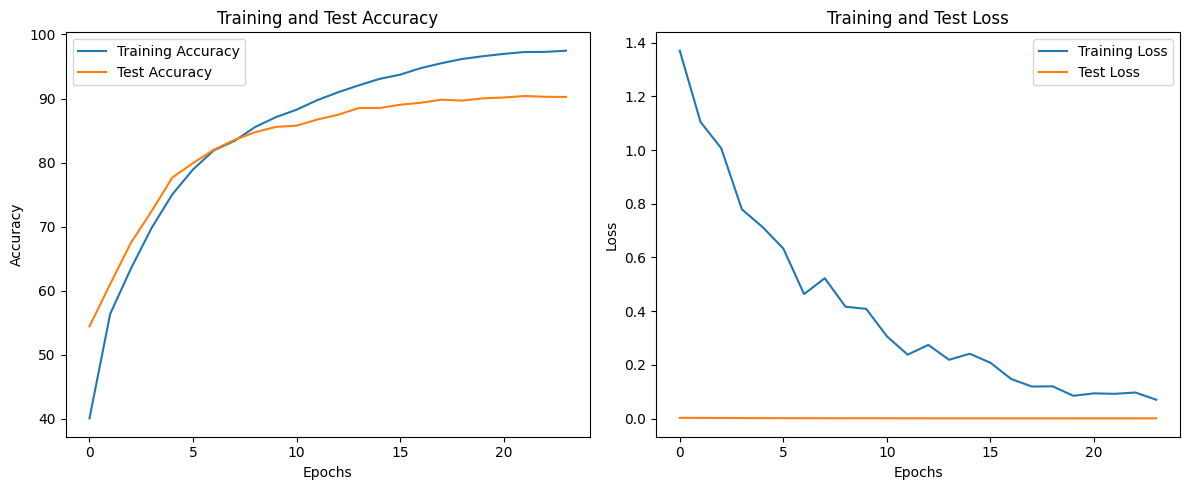

In [12]:
import matplotlib.pyplot as plt


epochs = range(len(train_accuracy))

# Create a new figure
plt.figure(figsize=(12, 5))

# Create a subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, test_accuracy, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Create a subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the figure
plt.tight_layout()
plt.show()

Text(0, 0.5, 'learning rate')

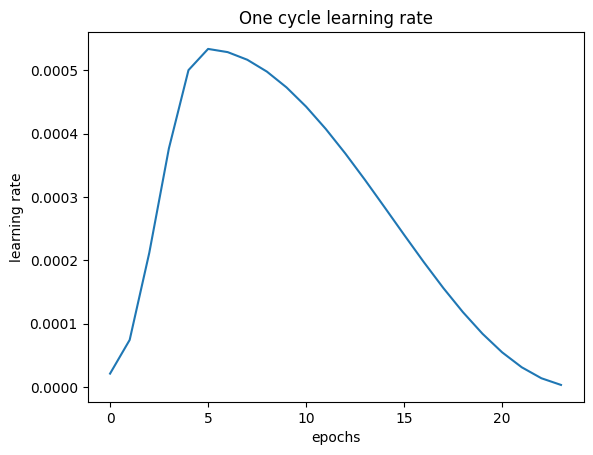

In [13]:
plt.plot(epochs, learning_rate)
plt.title('One cycle learning rate')
plt.xlabel('epochs')
plt.ylabel('learning rate')

In [14]:

torch.save(model.state_dict(), 'final_model.pth')

In [15]:
model = Net()

model.load_state_dict(torch.load('final_model.pth',map_location=torch.device('cpu')))

model.eval()

Net(
  (PrepLayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convblock1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (R1_c1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (R1_c2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convblock2): S

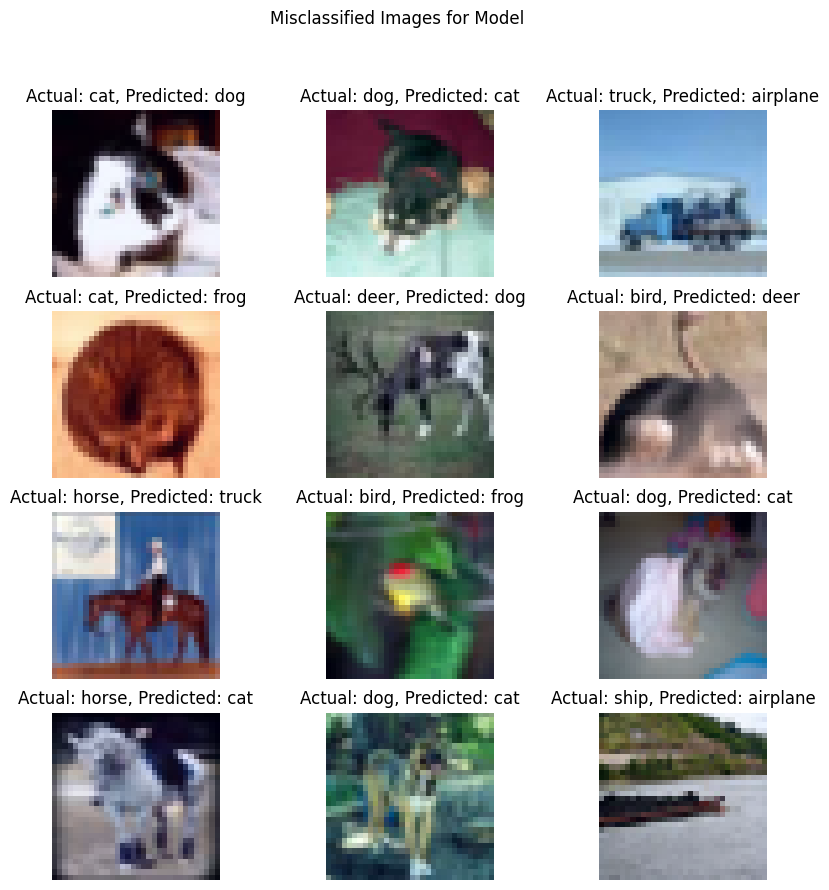

In [16]:
from utils import test_and_find_misclassified, display_misclassified_images
misclassified_images, misclassified_labels, misclassified_preds = test_and_find_misclassified(model, test_loader,torch.device('cpu'))
display_misclassified_images(misclassified_images[:12], misclassified_labels[:12], misclassified_preds[:12], 'Misclassified Images for Model')